In [89]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [33]:
X_train_tfidf = pd.read_csv("X_train_tfidf.csv", delimiter= ',')
X_test_tfidf = pd.read_csv("X_test_tfidf.csv", delimiter= ',')
y_train = pd.read_csv("y_train.csv", delimiter= ',')
y_test = pd.read_csv("y_test.csv", delimiter= ',')


In [34]:
y_train = y_train.drop('Unnamed: 0', axis=1)

y_train

,Fake
0,0
1,0
2,1
3,1
4,1
...,...
1275,0
1276,1
1277,0
1278,1


In [35]:
y_test = y_test.drop('Unnamed: 0', axis=1)

y_test

,Fake
0,0
1,0
2,1
3,1
4,0
...,...
315,1
316,1
317,1
318,1


In [94]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy score of the training data :  0.85859375
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       636
           1       0.81      0.95      0.87       644

    accuracy                           0.86      1280
   macro avg       0.87      0.86      0.86      1280
weighted avg       0.87      0.86      0.86      1280



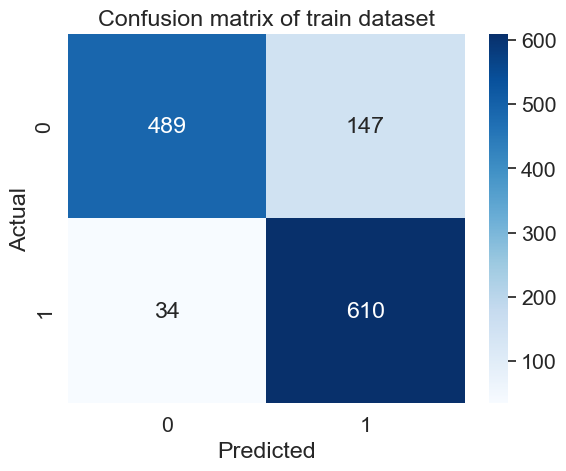

In [95]:
def train_predict_acc(model, X_train_tfidf, y_train):
    # accuracy score on the training data
    X_train_prediction = model.predict(X_train_tfidf)

    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    print('Accuracy score of the training data : ', training_data_accuracy)

    print(classification_report(y_train, X_train_prediction))

    cm1 = confusion_matrix(y_train, X_train_prediction)
    ax = plt.subplot()
    sn.set(font_scale=1.4 ) # for label size
    sn.heatmap(cm1, annot=True, fmt='d', ax=ax, cmap='Blues') # font size
    ax.set_title("Confusion matrix of train dataset")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    plt.show()
train_predict_acc(model, X_train_tfidf, y_train)

Accuracy score of the test data :  0.8
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       164
           1       0.73      0.93      0.82       156

    accuracy                           0.80       320
   macro avg       0.82      0.80      0.80       320
weighted avg       0.82      0.80      0.80       320



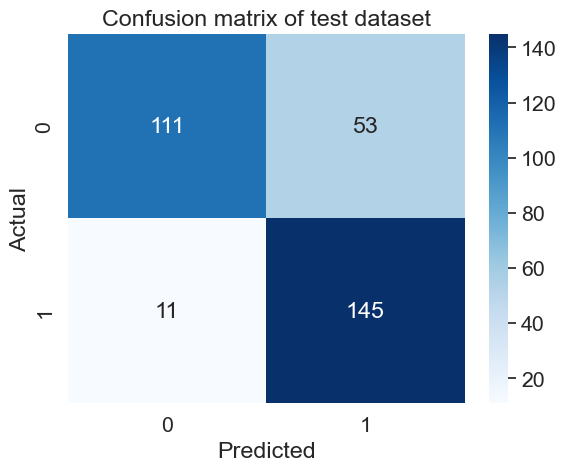

In [96]:
def test_predict_acc(model, X_test_tfidf, y_test):
    # accuracy score on the test data
    X_test_prediction = model.predict(X_test_tfidf)

    test_data_accuracy = accuracy_score(X_test_prediction, y_test)
    print('Accuracy score of the test data : ', test_data_accuracy)

    print(classification_report(y_test, X_test_prediction))

    cm2 = confusion_matrix(y_test, X_test_prediction)
    ax = plt.subplot()
    sn.set(font_scale=1.4 ) # for label size
    sn.heatmap(cm2, annot=True, fmt='d', ax=ax, cmap='Blues') # font size
    ax.set_title("Confusion matrix of test dataset")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    plt.show()
test_predict_acc(model, X_test_tfidf, y_test)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of the test data :  0.9296875
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       636
           1       0.90      0.96      0.93       644

    accuracy                           0.93      1280
   macro avg       0.93      0.93      0.93      1280
weighted avg       0.93      0.93      0.93      1280



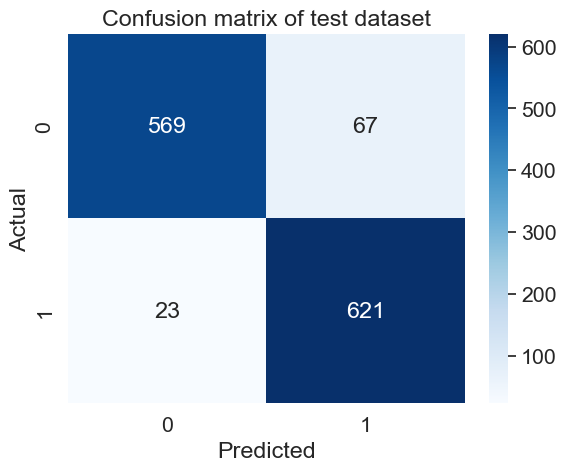

In [76]:
model2 = svm.SVC(kernel='linear')
model2.fit(X_train_tfidf, y_train)
train_predict_acc(model2, X_train_tfidf, y_train)

Accuracy score of the training data :  0.9296875
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       636
           1       0.90      0.96      0.93       644

    accuracy                           0.93      1280
   macro avg       0.93      0.93      0.93      1280
weighted avg       0.93      0.93      0.93      1280



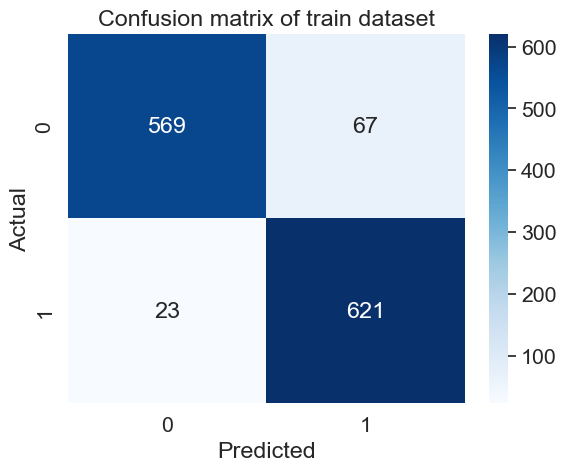

Accuracy score of the test data :  0.809375
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       164
           1       0.77      0.87      0.82       156

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



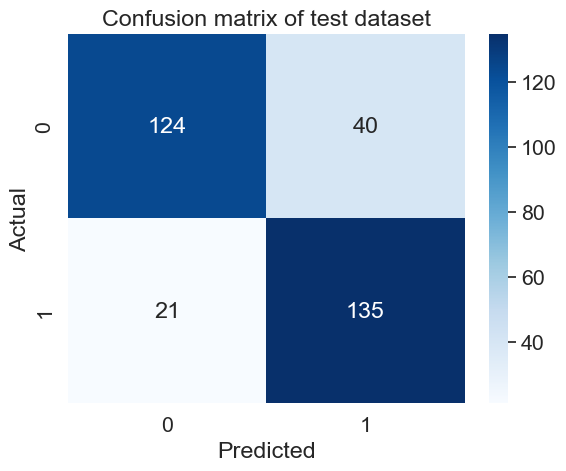

In [97]:
train_predict_acc(model2, X_train_tfidf, y_train)
test_predict_acc(model2, X_test_tfidf, y_test)

In [81]:
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

Accuracy score of the test data :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       636
           1       1.00      1.00      1.00       644

    accuracy                           1.00      1280
   macro avg       1.00      1.00      1.00      1280
weighted avg       1.00      1.00      1.00      1280



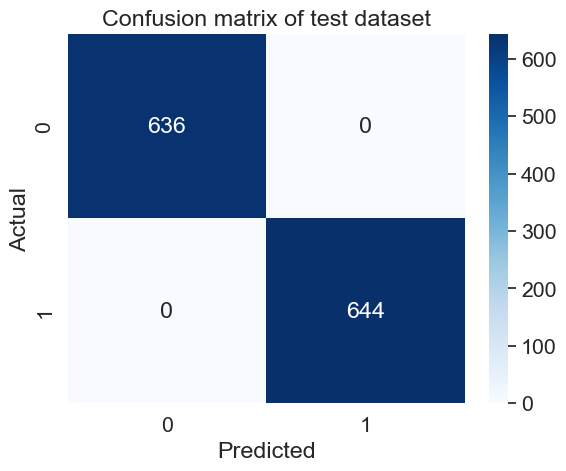

Accuracy score of the test data :  0.746875
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       164
           1       0.74      0.74      0.74       156

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



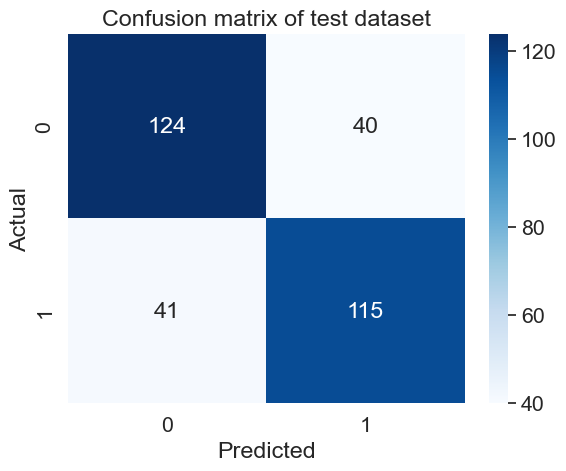

In [82]:
train_predict_acc(model3, X_train_tfidf, y_train)
test_predict_acc(model3, X_test_tfidf, y_test)

In [83]:
model4 = svm.SVC()
model4.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

Accuracy score of the test data :  0.75703125
              precision    recall  f1-score   support

           0       0.93      0.56      0.69       636
           1       0.69      0.96      0.80       644

    accuracy                           0.76      1280
   macro avg       0.81      0.76      0.75      1280
weighted avg       0.81      0.76      0.75      1280



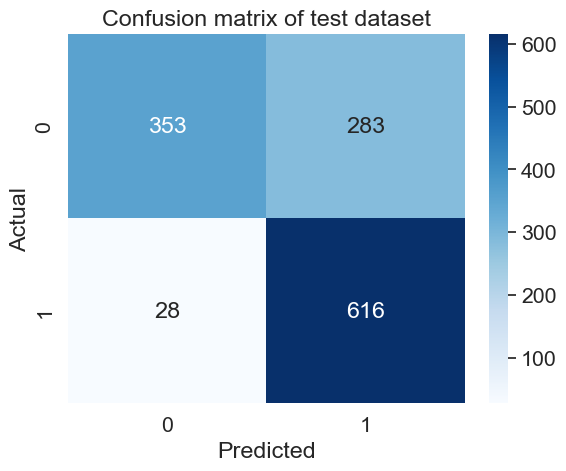

Accuracy score of the test data :  0.759375
              precision    recall  f1-score   support

           0       0.96      0.55      0.70       164
           1       0.68      0.97      0.80       156

    accuracy                           0.76       320
   macro avg       0.82      0.76      0.75       320
weighted avg       0.82      0.76      0.75       320



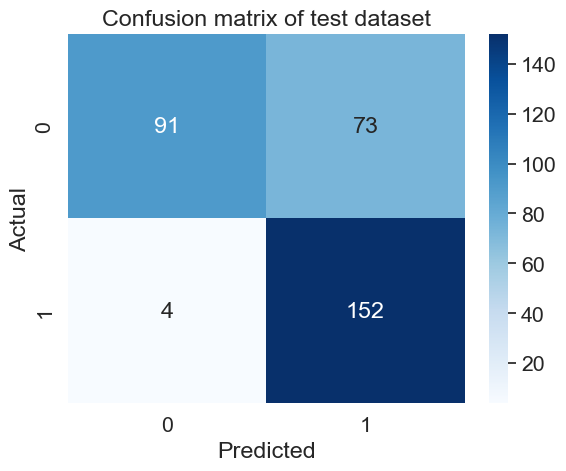

In [84]:
train_predict_acc(model4, X_train_tfidf, y_train)
test_predict_acc(model4, X_test_tfidf, y_test)

In [87]:
model5 = GaussianNB()
model5.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

Accuracy score of the test data :  0.95859375
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       636
           1       0.92      1.00      0.96       644

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



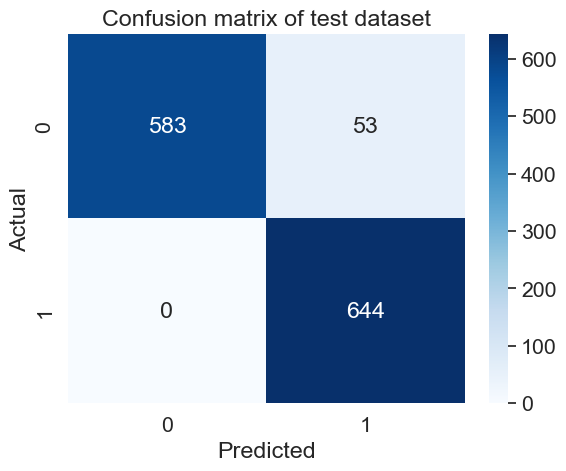

Accuracy score of the test data :  0.653125
              precision    recall  f1-score   support

           0       0.72      0.54      0.61       164
           1       0.61      0.78      0.69       156

    accuracy                           0.65       320
   macro avg       0.66      0.66      0.65       320
weighted avg       0.67      0.65      0.65       320



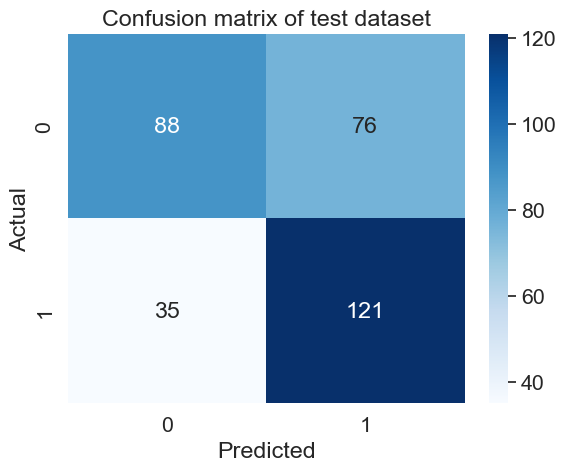

In [88]:
train_predict_acc(model5, X_train_tfidf, y_train)
test_predict_acc(model5, X_test_tfidf, y_test)

In [92]:
model6 = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
model6.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute', n_neighbors=3)

Accuracy score of the test data :  0.95859375
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       636
           1       0.92      1.00      0.96       644

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



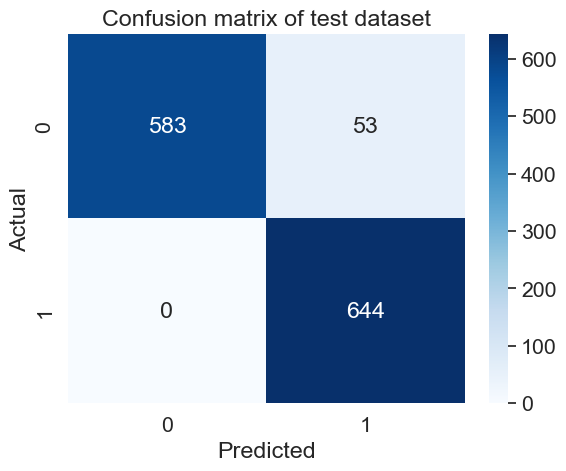

Accuracy score of the test data :  0.653125
              precision    recall  f1-score   support

           0       0.72      0.54      0.61       164
           1       0.61      0.78      0.69       156

    accuracy                           0.65       320
   macro avg       0.66      0.66      0.65       320
weighted avg       0.67      0.65      0.65       320



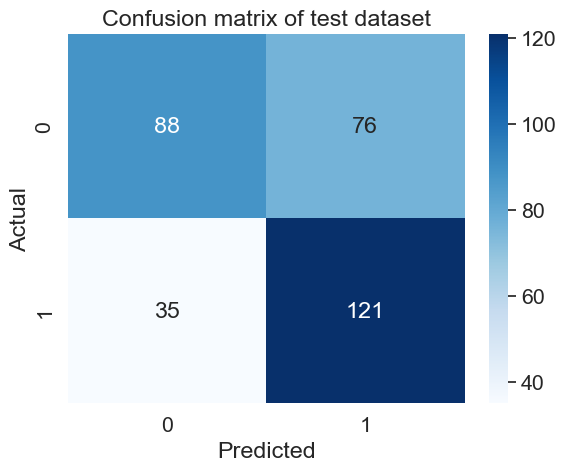

In [93]:
train_predict_acc(model6, X_train_tfidf, y_train)
test_predict_acc(model6, X_test_tfidf, y_test)